In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import caffe
import cv2
from pandas import read_csv
import os

%matplotlib inline

In [3]:
from utils import parse_folder, bbox, image_load

In [ ]:
from joblib import Parallel, delayed

In [4]:
root_folder = '/home/ubuntu/dataset/'
run_mode = 'train_512'

In [5]:
mode = run_mode
in_folder = os.path.join(root_folder, mode)

In [6]:
names = parse_folder(in_folder, "jpeg")

In [7]:
pd = read_csv(os.path.join(in_folder, "labels.txt"), names=['image', 'label'], index_col='image', header=0)

In [8]:
def extract_filename_in_path(path):
    return path.strip('/').split('/')[-1].split('.')[0]

In [10]:
for n in names:
    img = image_load(n)
    name_key = extract_filename_in_path(n)
    out_name = os.path.join(in_folder, "%d" % (pd.ix[name_key]['label']), name_key)
    break

## Image processing trials

In [11]:
pd.ix[pd.label==2].head()

,label
image,
15_right,2
30_right,2
40_left,2
51_left,2
54_left,2


In [12]:
img = image_load(os.path.join(in_folder, "30_right.jpeg"))

Mon, 04 Jan 2016 13:36:49 [30818] LOG: bbox: Shape (512, 683, 3)


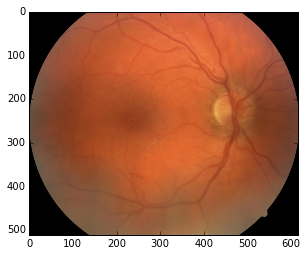

In [13]:
cimg = bbox(img)
plt.imshow(cimg)

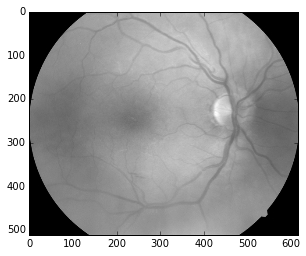

In [14]:
gimg = cv2.cvtColor(cimg, cv2.COLOR_RGB2GRAY)
plt.imshow(gimg, cmap='gray')

## Morphological BlackHat op to extract the nerves and spots

In [ ]:
dimg = cv2.morphologyEx(gimg, cv2.MORPH_BLACKHAT, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11)))
timg = cv2.morphologyEx(dimg, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
timg[:, :5] = 0
timg[:, -5:] = 0
timg[:5, :] = 0
timg[-5:, :] = 0
plt.imshow(timg, cmap='gray')

## Try and extract the optic disk

In [48]:
from skimage import exposure, img_as_float

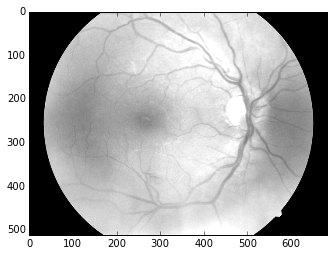

In [52]:
nimg = img[:,:,1]
nimg = img_as_float(nimg)
p2, p98 = np.percentile(nimg, (2, 98))
aimg = exposure.rescale_intensity(nimg, in_range=(p2, p98))
plt.imshow(aimg, cmap='gray')